# Project 4 - West Nile Virus Classification

## Part 2 - EDA

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KernelDensity

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
#load the datasets

spray = pd.read_csv('../assets/clean_data/spray_clean.csv')
weather = pd.read_csv('../assets/clean_data/weather_clean.csv')
train = pd.read_csv('../assets/clean_data/train_clean.csv')
test = pd.read_csv('../assets/clean_data/test_clean.csv')
merged = pd.read_csv('../assets/clean_data/mergeddf.csv')
merged_test = pd.read_csv('../assets/clean_data/mergeddf_test.csv')


In [3]:
print('Apart from the dependent variable, namely wnvpresent, we observe other column which is not available in test dataset, i.e. nummosquitoes\n')
print('model dataset -', merged.columns)
print('test dataset - ', merged_test.columns)

Apart from the dependent variable, namely wnvpresent, we observe other column which is not available in test dataset, i.e. nummosquitoes

model dataset - Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'wnvpresent', 'nummosquitos', 'year', 'month', 'week', 'dayofweek',
       'station', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')
test dataset -  Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'year', 'month', 'week', 'dayofweek', 'station', 'tmax', 'tmin', 'tavg',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',


In [4]:
#define a function to plot heatmap

def plot_heatmap(dataset, size_x=8, size_y=8, title="", title_font_size=12):
    plt.figure(figsize=(size_x,size_y))

    mask = np.zeros_like(dataset.corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    hm = sns.heatmap(dataset.corr(), mask=mask, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'11'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    hm.set_xticklabels(hm.xaxis.get_ticklabels(), fontsize=14)
    hm.set_yticklabels(hm.yaxis.get_ticklabels(), fontsize=14)

    hm.set_title(title, fontsize=title_font_size);
    
    return hm

**Observation of the data available**

We can observe a rather inbalanced dataset here. WNV present comprised only approx. 5% of the dataset



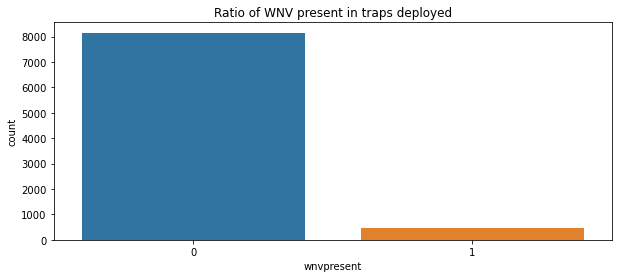

In [5]:
print('We can observe a rather inbalanced dataset here. WNV present comprised only approx. 5% of the dataset')
# print (merged['wnvpresent'].value_counts())
print ()
plt.figure(figsize=(10,4))
sns.countplot(x='wnvpresent', data=merged)
plt.title('Ratio of WNV present in traps deployed');

Most traps were deployed were deployed in the month of August. every year except for 2011 when most traps were deployed in July followed by September.


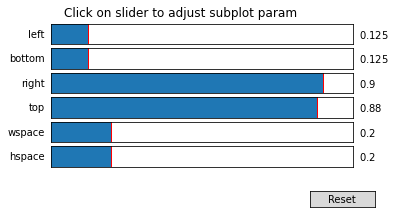

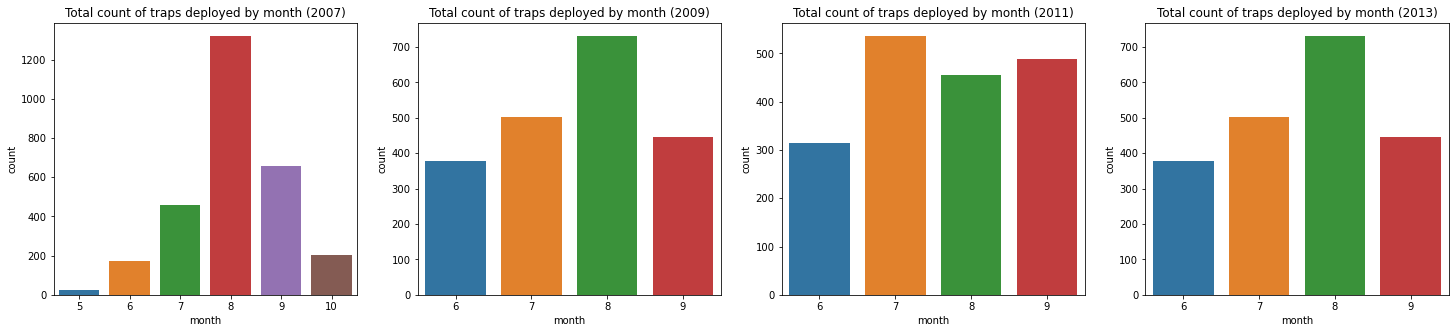

In [29]:
# Check traps deployed by month based on different years
merged_2007 = merged[merged['year'] == 2007]
merged_2009 = merged[merged['year'] == 2009]
merged_2011 = merged[merged['year'] == 2011]
merged_2013 = merged[merged['year'] == 2013]

print('Most traps were deployed were deployed in the month of August. every year except for 2011 when most traps were deployed in July followed by September.')

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
sns.countplot(x='month', data=merged_2007)
plt.title('Total count of traps deployed by month (2007)');

plt.subplot(1,4,2)
sns.countplot(x='month', data=merged_2013)
plt.title('Total count of traps deployed by month (2009)');

plt.subplot(1,4,3)
sns.countplot(x='month', data=merged_2011)
plt.title('Total count of traps deployed by month (2011)');

plt.subplot(1,4,4)
sns.countplot(x='month', data=merged_2013)
plt.title('Total count of traps deployed by month (2013)');

plt.subplot_tool();

WNV appeared to have the highest presence during July-Sept of the year


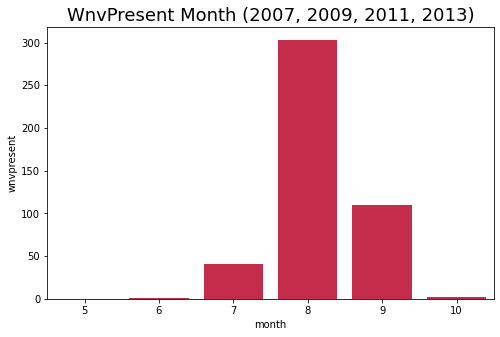

In [7]:
print('WNV appeared to have the highest presence during July-Sept of the year')

plt.figure(figsize=(8,5))
group_df = merged.groupby(by='month').sum().reset_index()
sns.barplot(data=group_df, x='month', y='wnvpresent', color='crimson')
plt.title('WnvPresent Month (2007, 2009, 2011, 2013)', fontsize=18);

Most traps with WNVs found in August every year, except for 2011 when the maximum traps with WNV were found in September. 


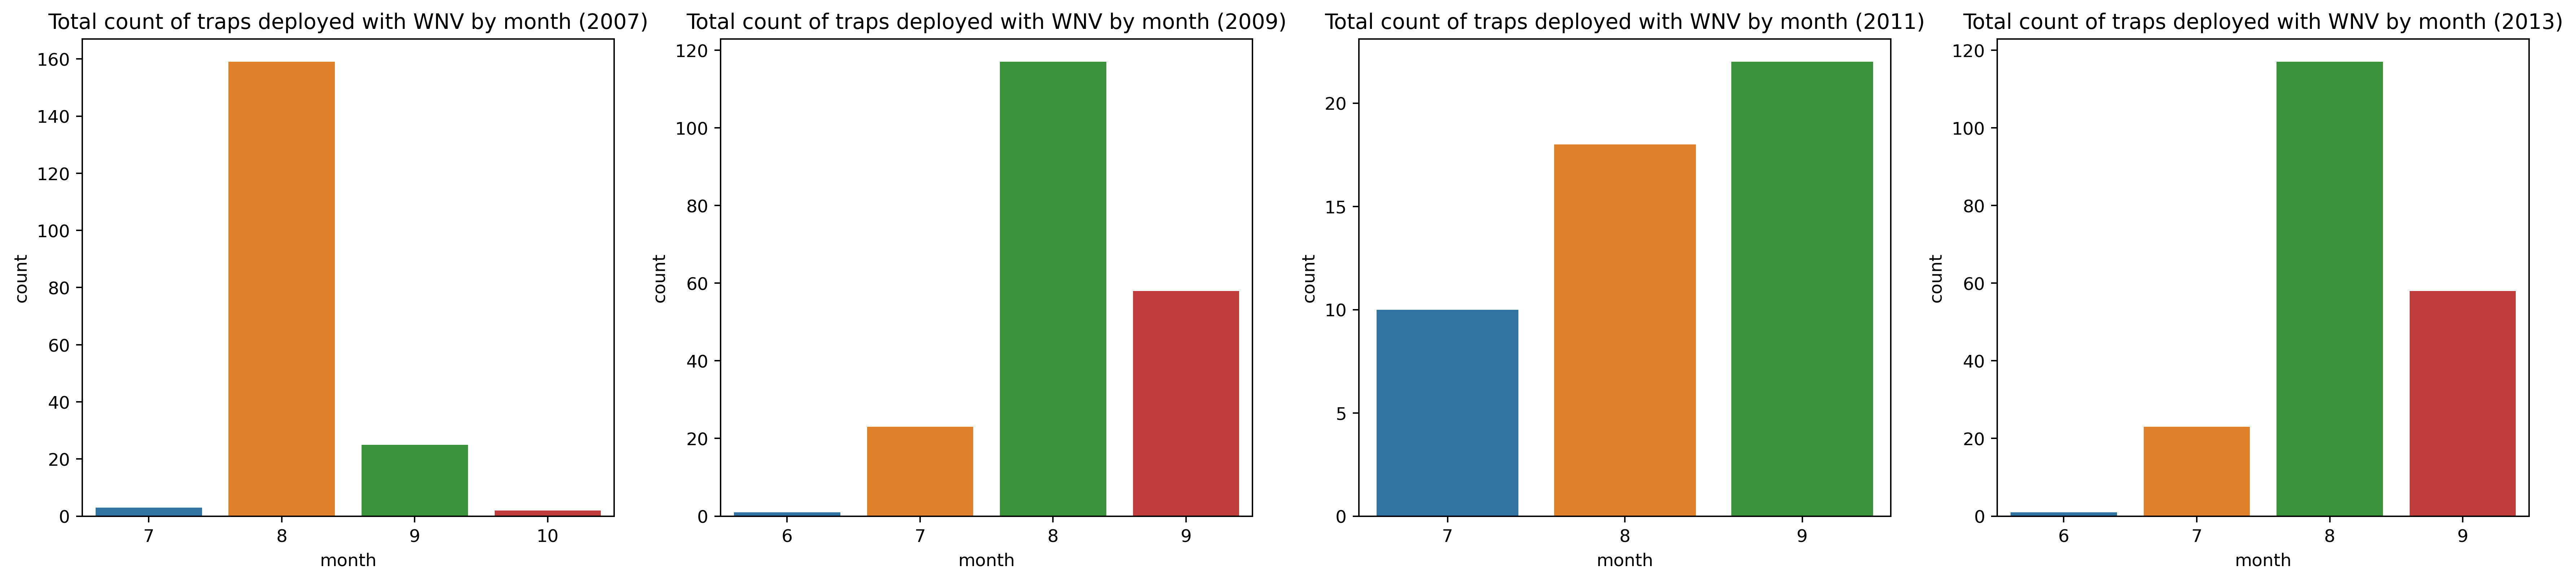

In [8]:
# Check traps with WNV month based on different years

print('Most traps with WNVs found in August every year, except for 2011 when the maximum traps with WNV were found in September. ')

wnv_merged_2007 = merged[(merged['year'] == 2007) & (merged['wnvpresent'] == 1)]
wnv_merged_2009 = merged[(merged['year'] == 2009) & (merged['wnvpresent'] == 1)]
wnv_merged_2011 = merged[(merged['year'] == 2011) & (merged['wnvpresent'] == 1)]
wnv_merged_2013 = merged[(merged['year'] == 2013) & (merged['wnvpresent'] == 1)]

plt.figure(figsize=(25,5), dpi=350)

plt.subplot(1,4,1)
sns.countplot(x='month', data=wnv_merged_2007)
plt.title('Total count of traps deployed with WNV by month (2007)');

plt.subplot(1,4,2)
sns.countplot(x='month', data=wnv_merged_2013)
plt.title('Total count of traps deployed with WNV by month (2009)');

plt.subplot(1,4,3)
sns.countplot(x='month', data=wnv_merged_2011)
plt.title('Total count of traps deployed with WNV by month (2011)');

plt.subplot(1,4,4)
sns.countplot(x='month', data=wnv_merged_2013)
plt.title('Total count of traps deployed with WNV by month (2013)');

On average, temperature peaks sometime between July - Sept during the year.
This could be an explanation for the relatively high number of WNV detected during these months


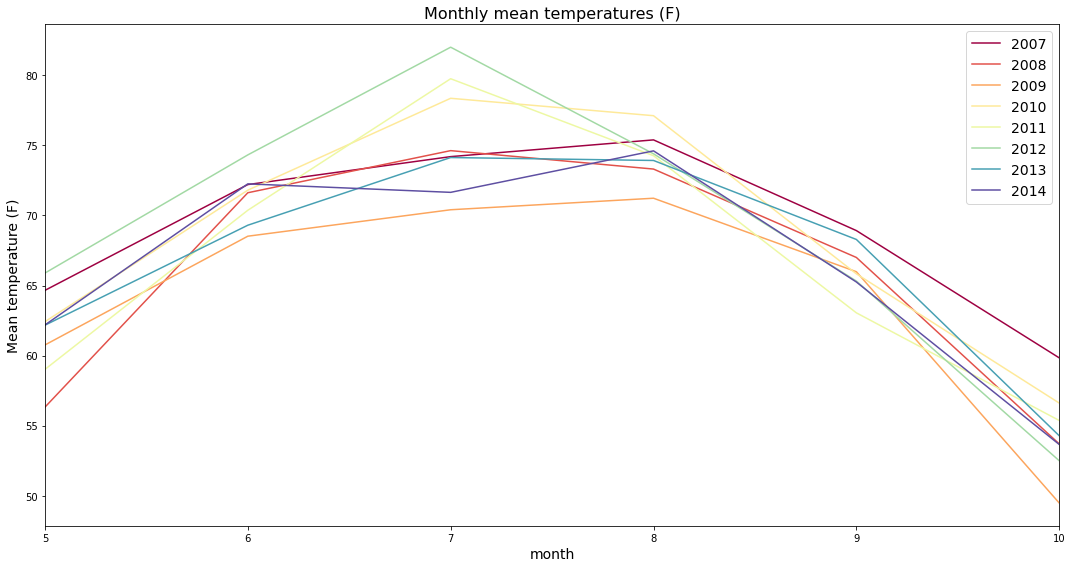

In [9]:
print('On average, temperature peaks sometime between July - Sept during the year.\nThis could be an explanation for the relatively high number of WNV detected during these months')

plt.figure(figsize=(15,8))
sns.lineplot(x = 'month',y = 'tavg', data = weather, hue = 'year', ci = None, 
             legend = 'full', palette = 'Spectral')
plt.legend(fontsize = 14)
plt.title('Monthly mean temperatures (F)', fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('Mean temperature (F)',fontsize=14)
plt.xlim(weather.month.min(), weather.month.max())
plt.tight_layout()

We set out below the species of mosquitoes tested positive as WNV carrier in the sample.

According to Centers for Disease Control and Prevention (CDC)'s [list](https://www.cdc.gov/westnile/resources/pdfs/MosquitoSpecies1999-2016.pdf), all the species listed below are WNV carriers. However, in this dataset, some species appear as NIL WMV present due to lack of sample data. 



                  species  nummosquitos  wnvpresent
0         CULEX ERRATICUS             7           0
1           CULEX PIPIENS         44671         184
2  CULEX PIPIENS/RESTUANS         66268         225
3          CULEX RESTUANS         23431          48
4        CULEX SALINARIUS           145           0
5          CULEX TARSALIS             7           0
6         CULEX TERRITANS           510           0


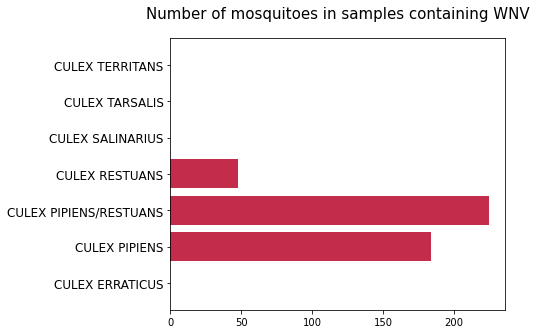

In [10]:
mos_wnv = merged[['species', 'nummosquitos', 'wnvpresent']].groupby(by='species').sum().reset_index()
print(mos_wnv)

plt.figure(figsize=(6,5))
plt.barh(mos_wnv['species'], mos_wnv['wnvpresent'], color='#C32D4B')
plt.title('Number of mosquitoes in samples containing WNV', fontsize=15, y=1.05)
plt.yticks(fontsize=12)
plt.show()

Observing the heatmap, nummosquitoes and wnvpresent appeared to have low correlation with the weather variables. 
We also observe that some independent variables highly correlate with one another. This may lead to multicollinearity. 
We may consider dropping / combining features during the modelling process to have better prediction values. 


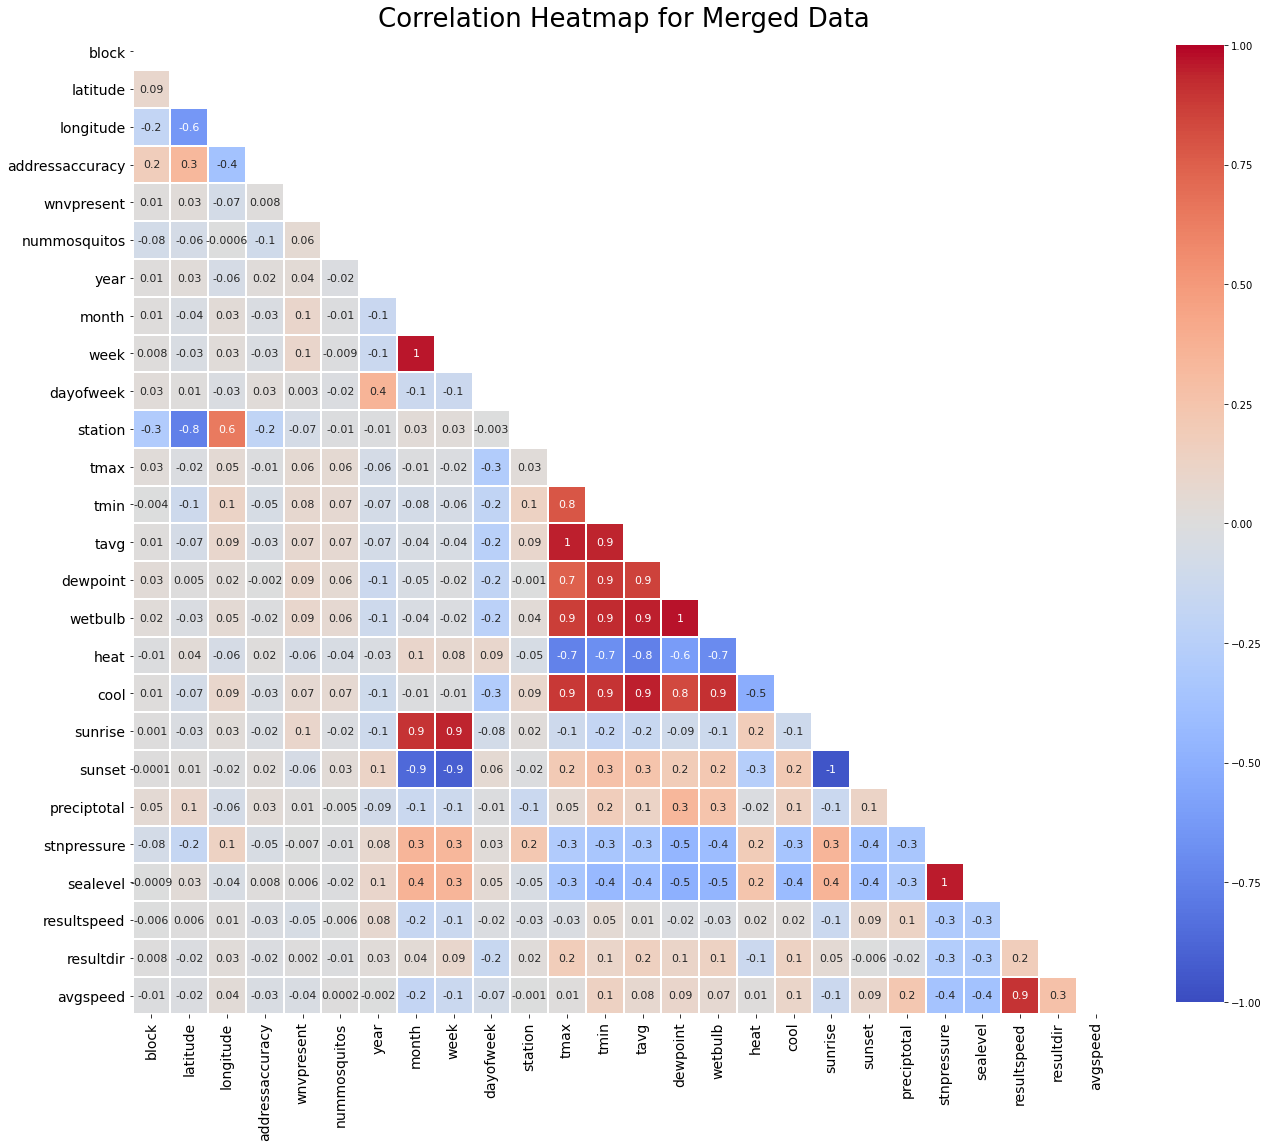

In [11]:
print('Observing the heatmap, nummosquitoes and wnvpresent appeared to have low correlation with the weather variables. \nWe also observe that some independent variables highly correlate with one another. This may lead to multicollinearity. \nWe may consider dropping / combining features during the modelling process to have better prediction values. ')

plot_heatmap(merged, size_x=22, size_y=22, title='Correlation Heatmap for Merged Data', title_font_size=26);

The graph shows that higher number of traps with West Nile Virus were found on days with higher average temperature.
We can also see that to some extent there are higher traps with Wnv found on days with higher humidity, which is indicated by higher DewPoint and WetBulb temperatures. However there are few days with high humidity where very few WnV were found.


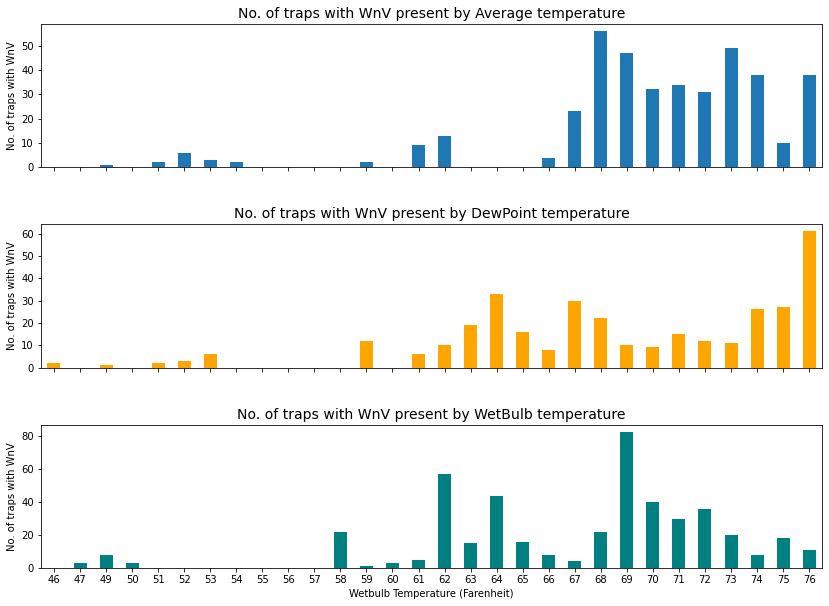

In [12]:
print('The graph shows that higher number of traps with West Nile Virus were found on days with higher average temperature.\nWe can also see that to some extent there are higher traps with Wnv found on days with higher humidity, which is indicated by higher DewPoint and WetBulb temperatures. However there are few days with high humidity where very few WnV were found.')

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12,18))
plt.subplots_adjust(hspace = 0.4)

res1 = pd.DataFrame(merged.groupby(['tavg'])['wnvpresent'].sum())
lp1 = res1.plot.bar(figsize=(14,10), ax=axes[0], legend=False)
lp1.set_title("No. of traps with WnV present by Average temperature", fontsize=14)
lp1.set_xlabel('Average Temperature (Farenheit)')
lp1.set_ylabel('No. of traps with WnV')

res2 = pd.DataFrame(merged.groupby(['dewpoint'])['wnvpresent'].sum())
lp2 = res2.plot.bar(figsize=(14,10), color='orange', ax=axes[1], legend=False)
lp2.set_title("No. of traps with WnV present by DewPoint temperature", fontsize=14)
lp2.set_xlabel('DewPoint Temperature (Farenheit)')
lp1.set_ylabel('No. of traps with WnV')

res3 = pd.DataFrame(merged.groupby(['wetbulb'])['wnvpresent'].sum())
lp3 = res3.plot.bar(figsize=(14,10), color='teal', ax=axes[2], legend=False)
lp3.set_xlabel('Wetbulb Temperature (Farenheit)')
lp2.set_ylabel('No. of traps with WnV')

lp3.set_title("No. of traps with WnV present by WetBulb temperature", fontsize=14)
lp3.set_xticklabels(lp3.get_xticklabels(), rotation=0, visible=True);
lp3.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False)
lp3.set_ylabel('No. of traps with WnV');


Mosquitoes population and breeding start to increase in the month of June, hit its peak in August and decrease thereafter.
Possible reason for decrease may be due to spraying and weather changes after hitting the peak


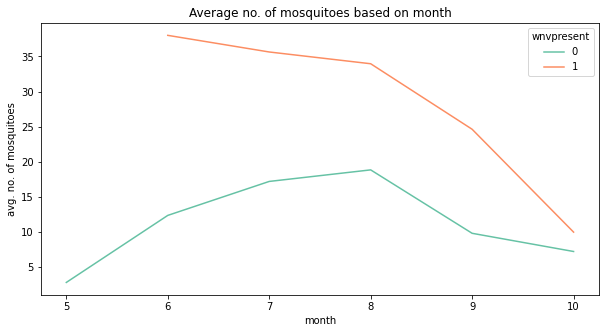

In [13]:
print('Mosquitoes population and breeding start to increase in the month of June, hit its peak in August and decrease thereafter.\nPossible reason for decrease may be due to spraying and weather changes after hitting the peak')

# Check no. of mosquitoes per month (by wnvpresent)
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='nummosquitos', data=merged, hue='wnvpresent', palette='Set2', ci=None)
plt.title('Average no. of mosquitoes based on month')
plt.ylabel('avg. no. of mosquitoes');

We find that in most years the graphs peak at the same time i.e. in August. Except for 2011. We had earlier observed that there were fewer traps laid in August in 2011 compared to other months.


<ipython-input-14-0b9ed1468c29>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lp2.set_xticklabels(['April','May', 'June', 'July', 'Aug', 'September', 'October']);


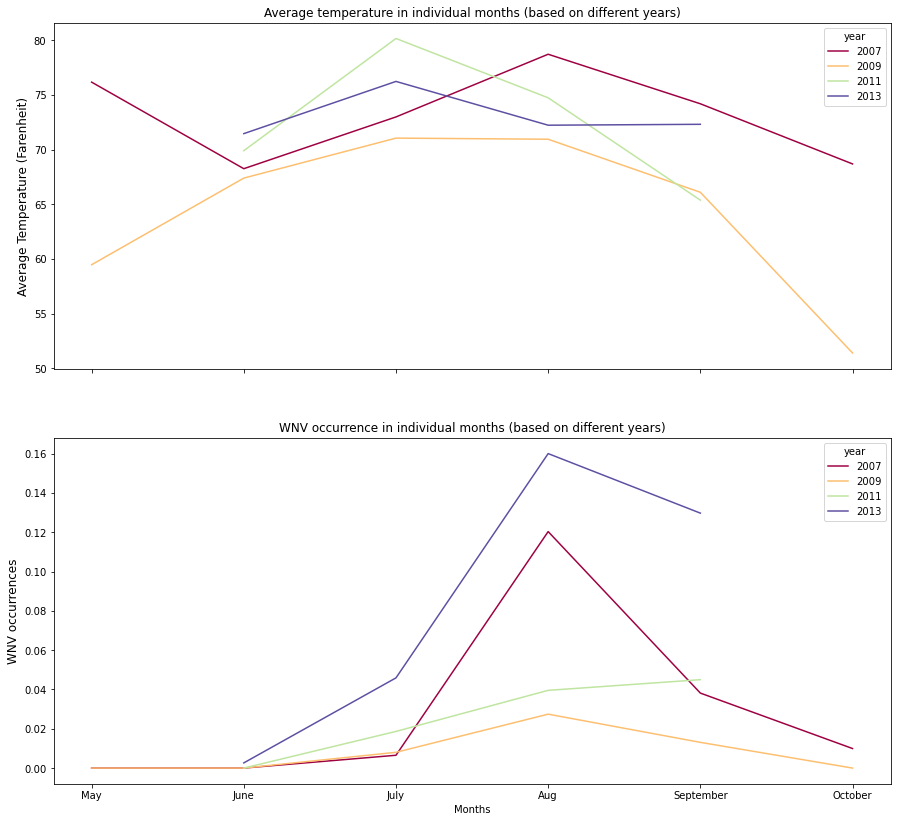

In [14]:
# Plot average temperatures and traps with wnvpresent from the merged dataset by monthe by year
print('We find that in most years the graphs peak at the same time i.e. in August. Except for 2011. We had earlier observed that there were fewer traps laid in August in 2011 compared to other months.')
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,14))

lp1 = sns.lineplot(x='month', y='tavg', ax=axes[0], data=merged, hue='year', palette='Spectral', ci=None);
lp1.set_title('Average temperature in individual months (based on different years)');
lp1.set_ylabel('Average Temperature (Farenheit)', fontsize=12);

lp2 = sns.lineplot(x='month', y='wnvpresent', ax=axes[1], data=merged, hue='year', palette='Spectral', ci=None);
lp2.set_title('WNV occurrence in individual months (based on different years)');
lp2.set_xticklabels(['April','May', 'June', 'July', 'Aug', 'September', 'October']);
lp2.set_xlabel('Months')
lp2.set_ylabel('WNV occurrences', fontsize=12);

Observing the map below, there seem to be more wnv present in the north side


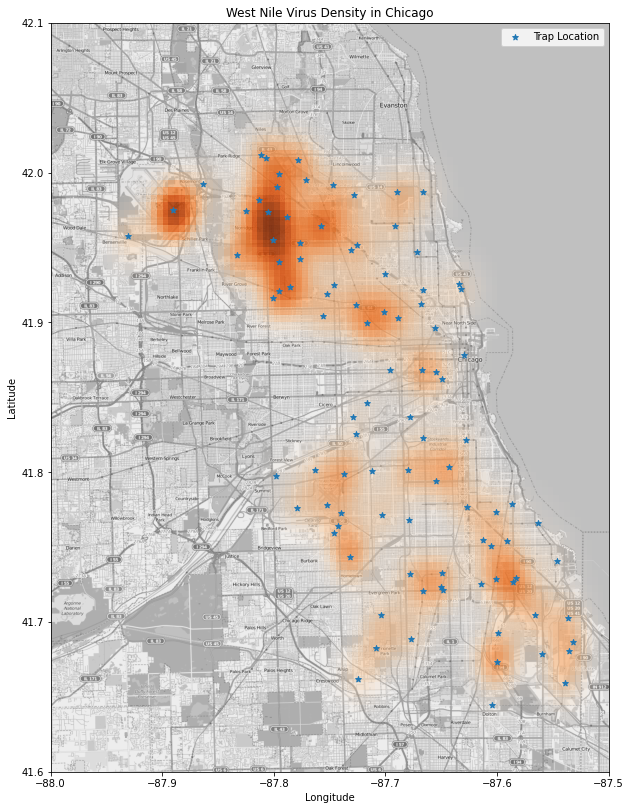

In [15]:
print('Observing the map below, there seem to be more wnv present in the north side')

mapdata = np.loadtxt("../assets/raw_data/mapdata_copyright_openstreetmap_contributors.txt")

alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
wnv = merged[merged['wnvpresent'] == 1]
wnv = wnv.groupby(['date', 'trap','longitude', 'latitude']).max()['wnvpresent'].reset_index()
X = wnv[['longitude', 'latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = wnv[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='*', label='Trap Location')


plt.title('West Nile Virus Density in Chicago')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('heatmap.png')

Observation of spray activities

In [16]:
spray['date'] = pd.to_datetime(spray['date'], format='%Y-%m-%d')
spray['month']= spray['date'].apply(lambda x: x.month)
spray['year']= spray['date'].apply(lambda x: x.year)
spray['week']= spray['date'].apply(lambda x: x.week)

Spray dataset seems limited to 2011 and 2013 only


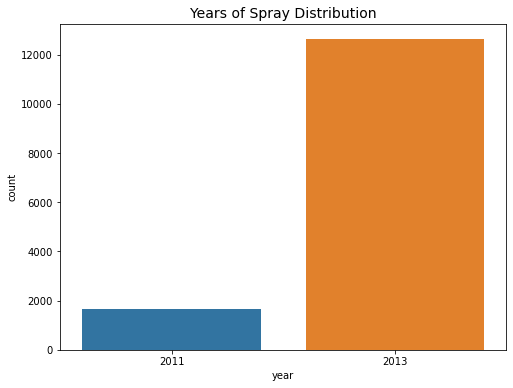

In [17]:
print('Spray dataset seems limited to 2011 and 2013 only')

# Visualization for range of year
plt.figure(figsize=(8,6))
sns.countplot(x='year', data=spray)
plt.title('Years of Spray Distribution', fontsize=14);

Spraying activities heavily concentrated in the months of July - Sept.


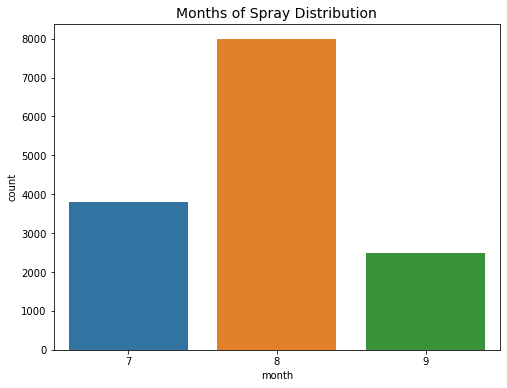

In [18]:
print('Spraying activities heavily concentrated in the months of July - Sept.')

# Visualization for range of month
plt.figure(figsize=(8,6))
sns.countplot(x='month', data=spray)
plt.title('Months of Spray Distribution', fontsize=14);


In [19]:
def plot_spray_data(column, color):
    for year in [2011, 2013]:
        fig, ax1 = plt.subplots(figsize=(10,4))
        temp_df = merged[merged['year']==year].groupby(['week'])[column].sum().to_frame()

        sns.lineplot(x=temp_df.index, y=temp_df[column],
                     ci=None, color=color, label=f'{column}', ax=ax1)
        ax1.set_ylabel(f'{column}', fontsize=13)
        ax1.legend(loc=1)
        
        if year in spray['year'].unique():
            for date in spray[spray['year'] == year].groupby('week').mean().index:
                plt.axvline(date, linestyle='--', color='black', alpha=0.5, label='Spray')
        
        plt.legend([f'{column}', 'spray'])
        plt.title(f'{column} in {year}', fontsize=13)
        plt.tight_layout()

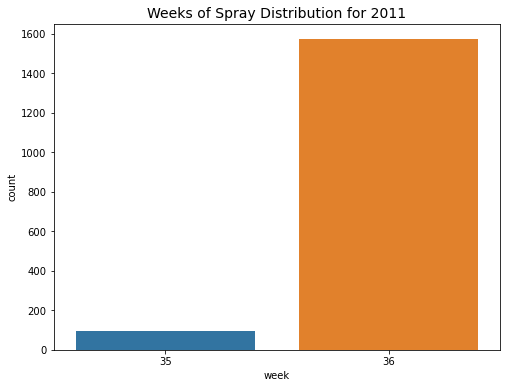

In [20]:
# Visualization for weeks - 2011 year
plt.figure(figsize=(8,6))
sns.countplot(x='week', data=spray[spray['year']==2011])
plt.title('Weeks of Spray Distribution for 2011', fontsize=14);

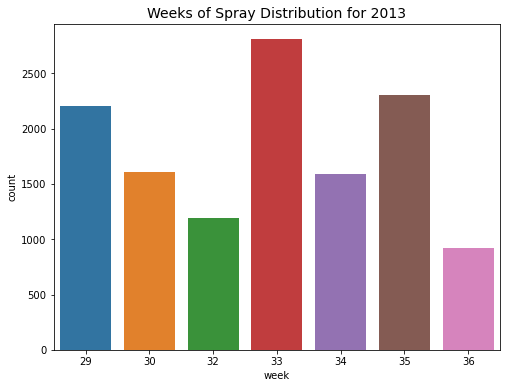

In [21]:
# Visualization for weeks - 2013 year
plt.figure(figsize=(8,6))
sns.countplot(x='week', data=spray[spray['year']==2013])
plt.title('Weeks of Spray Distribution for 2013', fontsize=14);

In 2011, maximum spraying was in week 36 (as observed in barplots above) we see a delayed drop in number of mosquitoes found after spraying, however this is also the end of the testing period. In the 2013 maximum spraying was done on weeks 29, 33, 35. It is hard to determine a clear impact of spraying on the West Nile Virus.


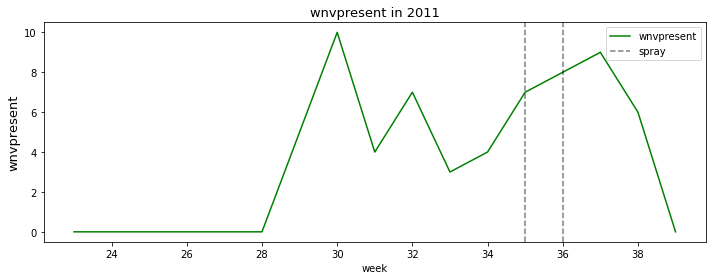

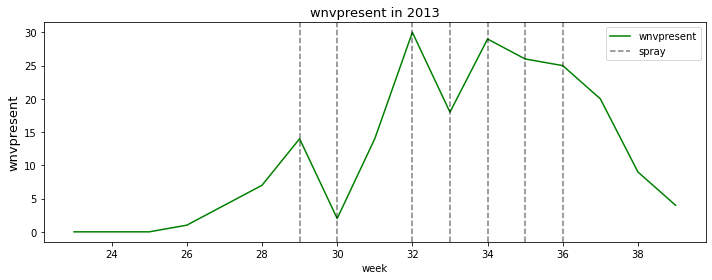

In [22]:
print('In 2011, maximum spraying was in week 36 (as observed in barplots above) we see a delayed drop in number of mosquitoes found after spraying, however this is also the end of the testing period. In the 2013 maximum spraying was done on weeks 29, 33, 35. It is hard to determine a clear impact of spraying on the West Nile Virus.')

plot_spray_data('wnvpresent', 'green')

#### Let's try to find the effect of spraying by comparing the wnv occurrence lcoations and spray locations based on the data available

In [23]:
def plot_train_kernel_density_by_year(year):
    # plot trap locations for each year
    alpha_cm = plt.cm.Oranges
    alpha_cm._init()
    alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
    mapdata = np.loadtxt("../assets/raw_data/mapdata_copyright_openstreetmap_contributors.txt")
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    lon_lat_box = (-88, -87.5, 41.6, 42.1)
    # traps locations by year
    X = merged.loc[(merged['year']==year),['longitude', 'latitude']].drop_duplicates().values
    kd = KernelDensity(bandwidth=0.015)
    kd.fit(X)
    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    # kernel density
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
    plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)
    # Weather Station locations
    plt.scatter(x = (-87.933, -87.752), y = (41.995, 41.786), marker='x', color='g', label='Weather Station')
    # trap locations by year
    trap_locations = merged.loc[merged['year']==year, ['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='b', label='trap Locations')
    # wnv outbreak locations
    wnv_locations = merged.loc[(merged['wnvpresent'] != 0)&(merged['year']==year)][['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(wnv_locations[:,0], wnv_locations[:,1], s=300, facecolors='none', edgecolors='red', linewidth = 1.5, label='WNV Outbreak Locations')
    plt.title(f'West Nile Virus Density in Chicago for {year}')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('heatmap.png')
    
    return

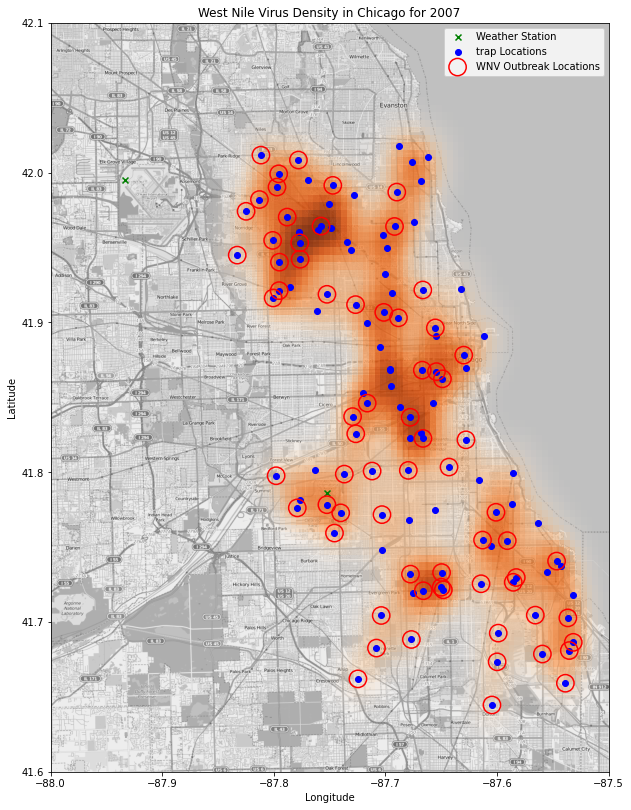

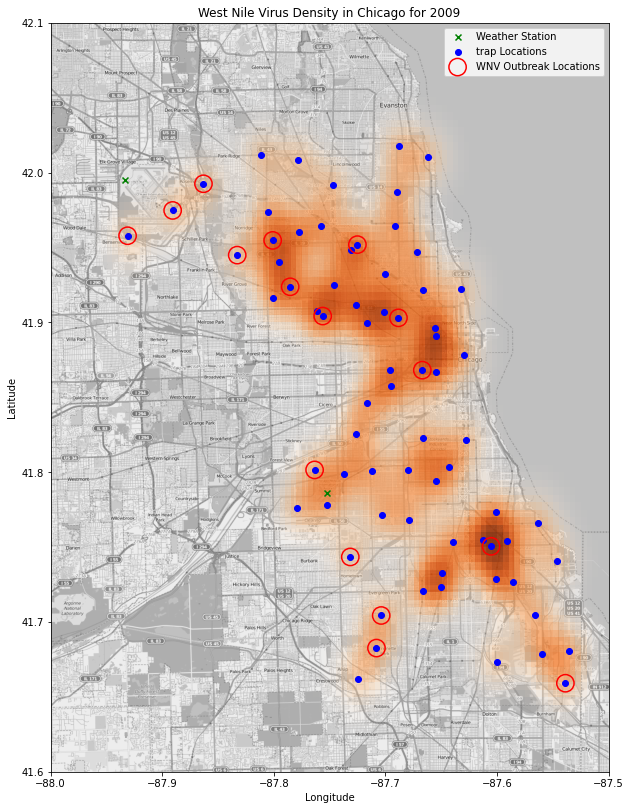

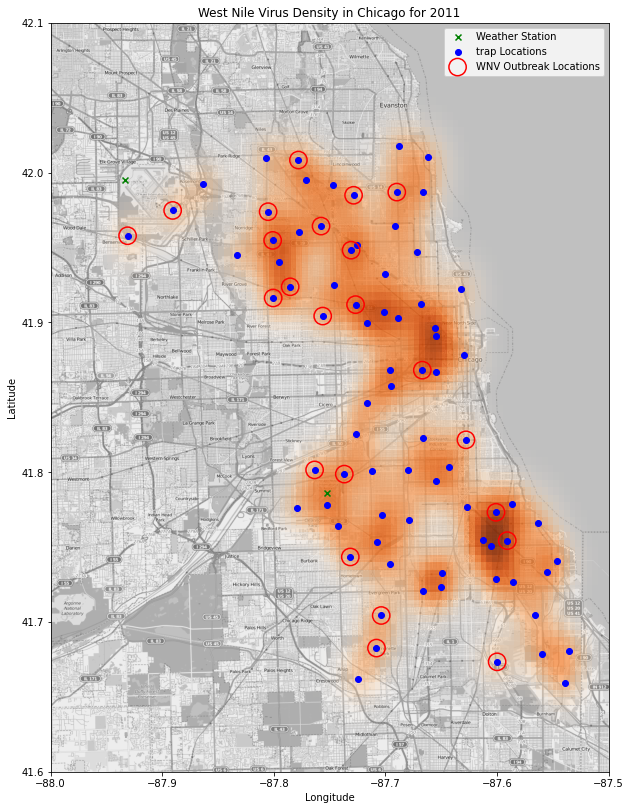

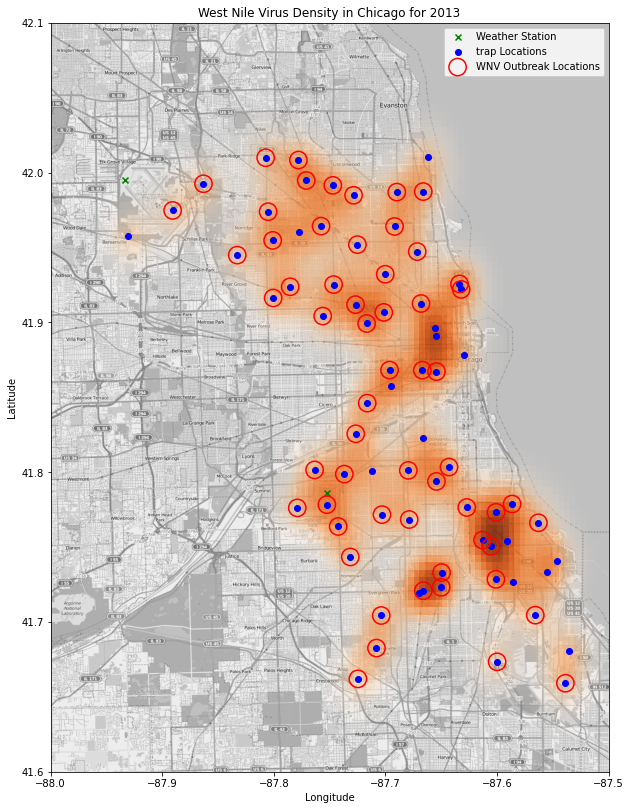

In [24]:
# Plot WNV occurrence by area every year
plot_train_kernel_density_by_year(2007)
plot_train_kernel_density_by_year(2009)
plot_train_kernel_density_by_year(2011)
plot_train_kernel_density_by_year(2013)

In [25]:
def plot_spray_kernel_density_by_year(year):
    # Check spray area via map
    mapdata = np.loadtxt("../assets/raw_data/mapdata_copyright_openstreetmap_contributors.txt")

    alpha_cm = plt.cm.YlGn
    alpha_cm._init()
    alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    lon_lat_box = (-88, -87.5, 41.6, 42.1)
    
    # spray locations every year
    X = spray.loc[spray['year']==year, ['longitude', 'latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)


    plt.title(f'Spray Density in Chicago for {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('heatmap.png');
    return

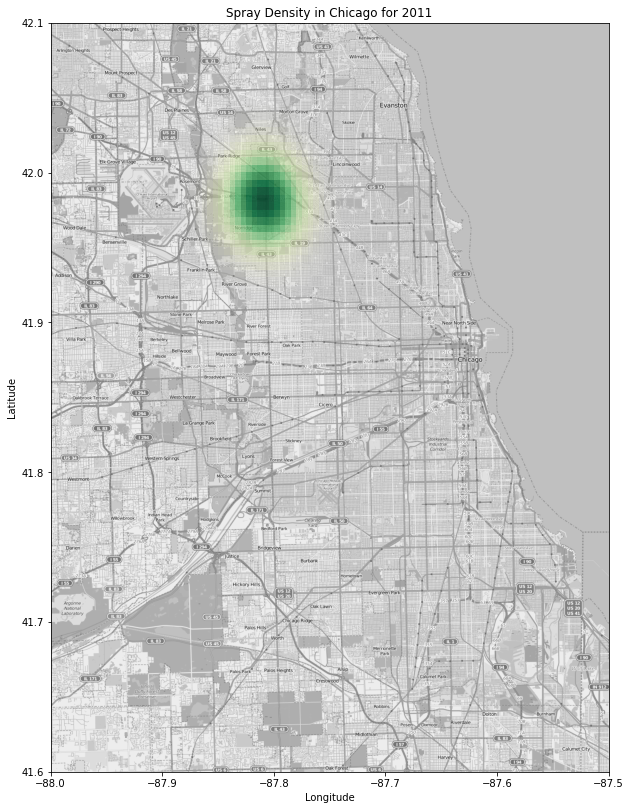

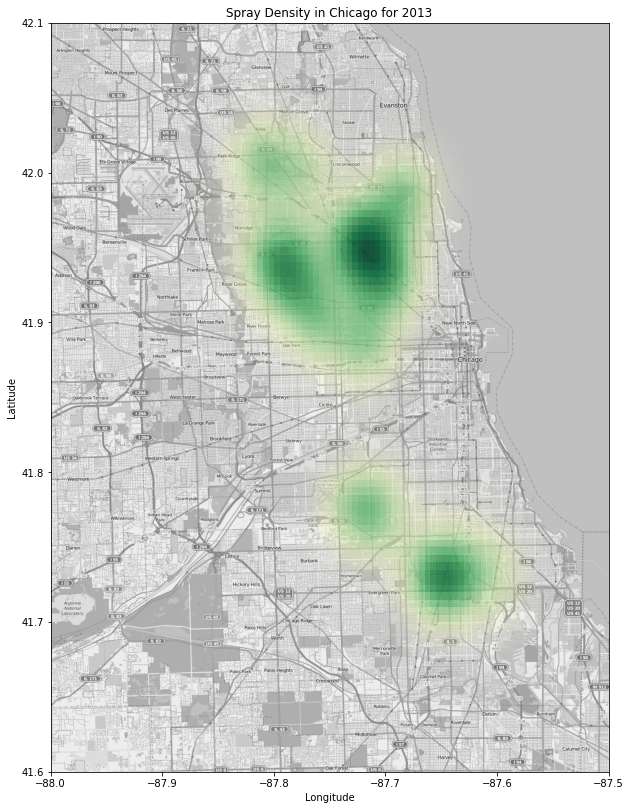

In [26]:

# Plot spray locations for 2011 and 2013
plot_spray_kernel_density_by_year(2011)
plot_spray_kernel_density_by_year(2013)


We find that data in 2011 may be too limited to draw inferences. However for 2013, we find that there is some evidence of reduction in occurrence of WNV compared to other years, in the northern areas where most of the spraying was done. 

### Overall observations:
- Weather condition (i.e heat/humidity) may lead to increase cases in WNV
- This observation supports our preliminary research
- There is preliminary evidence of positive effects of spraying in control on WNV Virus. However additional data and analysis is required to draw more conclusive inferences.